**Semana 5: Notebook procesamiento de imágenes**

In [4]:
%%capture
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/05/4d/53b30a2a3ac1f75f65a59eb29cf2ee7207ce64867db47036ad61743d5a23/opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 9.3 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests

/Users/jorgemagdaleno/PycharmProjects/pythonProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


*Conversion a Escala de Grises*

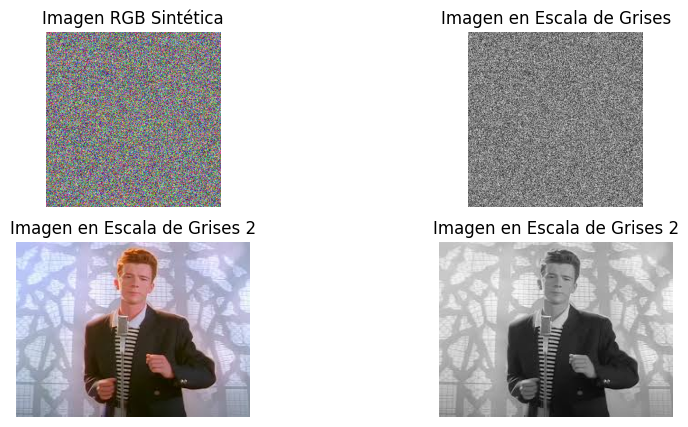

In [16]:
# Creacion de imagenes, aqui se define una imagen donde su dimension de 300 x 300 pixeles
imagen_array = np.random.randint(0, 256, (300, 300, 3), dtype=np.uint8)
image = cv2.imread("images.jpeg")
# Convertir a escala de grises
imagen_gris = cv2.cvtColor(imagen_array, cv2.COLOR_BGR2GRAY)
image_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mostrar imagenes
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(imagen_array, cv2.COLOR_BGR2RGB))
plt.title('Imagen RGB Sintética')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen en Escala de Grises 2')
plt.axis('off')


plt.subplot(2,2,4)
plt.imshow(image_gris, cmap='gray')
plt.title('Imagen en Escala de Grises 2')
plt.axis('off')
plt.show()


*Filtro Gauss*

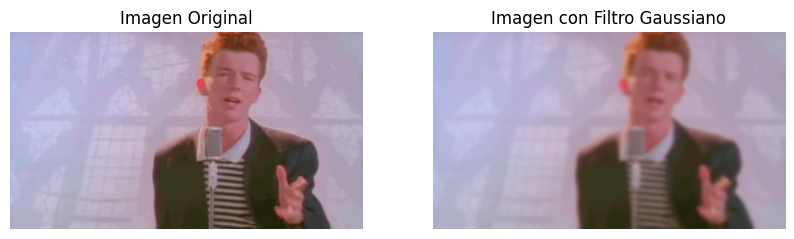

In [34]:
# URL de una imagen (ejemplo: pez Blue Tang de Wikipedia)
url = 'https://imagenes.rockfm.fm/files/webp_425_238/uploads/2024/09/19/66ec7f8f04089.jpeg'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

# Descargar la imagen
resp = requests.get(url, headers=headers)
if resp.status_code == 200:
    image_data = np.asarray(bytearray(resp.content), dtype="uint8")
    imagen_internet = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
else:
    print(resp.status_code)
    raise Exception("Error al descargar la imagen.")

# Aplicar un filtro Gaussiano para suavizar la imagen
imagen_suavizada = cv2.GaussianBlur(imagen_internet, (11, 11), 0)

# Mostrar la imagen original y la suavizada
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(imagen_internet, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(imagen_suavizada, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Filtro Gaussiano')
plt.axis('off')
plt.show()

*Deteccion de borde con Canny*

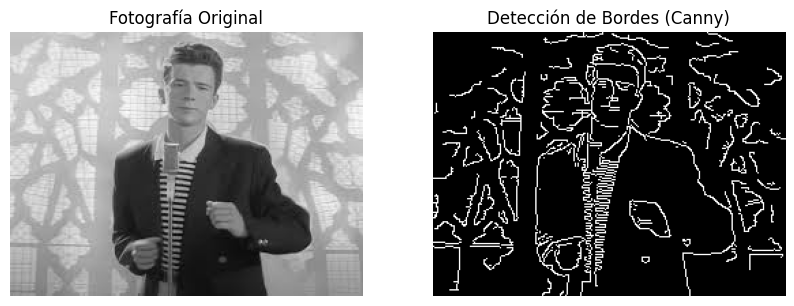

In [23]:

# Se usa imagenes en gris
# Aplicar el detector de bordes Canny
bordes = cv2.Canny(image_gris, 100, 200)
    
# Mostrar la fotografía original y la imagen con bordes detectados
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image_gris, cv2.COLOR_BGR2RGB))
plt.title('Fotografía Original')
plt.axis('off')
    
plt.subplot(1,2,2)
plt.imshow(bordes, cmap='gray')
plt.title('Detección de Bordes (Canny)')
plt.axis('off')
plt.show()

*Video a gris y aplicarcambio de dimensiones*

In [25]:
# Abrir el archivo de video o camara con cv2.VideoCapture(0))
captura = cv2.VideoCapture('video_1.mp4')


while True:
    ret, frame = captura.read()
    if not ret:
        break
    
    # Redimensionar el frame: fijar ancho deseado y mantener proporción
    ancho_deseado = 640
    escala = ancho_deseado / frame.shape[1]
    nuevo_alto = int(frame.shape[0] * escala)
    frame_redimensionado = cv2.resize(frame, (ancho_deseado, nuevo_alto))
    
    # Convertir el frame redimensionado a escala de grises
    frame_gris = cv2.cvtColor(frame_redimensionado, cv2.COLOR_BGR2GRAY)
    
    # Mostrar ambos frames
    cv2.imshow('Video Redimensionado', frame_redimensionado)
    cv2.imshow('Video en Escala de Grises', frame_gris)
    
    # Salir si se presiona la tecla 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

captura.release()
cv2.destroyAllWindows()

*Ecualizacion de histograma para incremento de contraste*

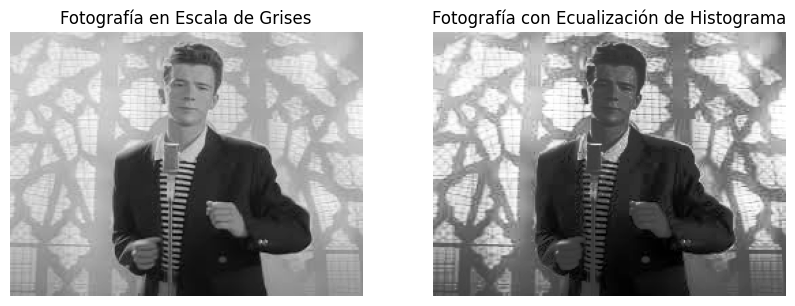

In [26]:
# Aplicar ecualización de histograma
foto_ecualizada = cv2.equalizeHist(image_gris)

# Mostrar la imagen original en gris y la ecualizada
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_gris, cmap='gray')
plt.title('Fotografía en Escala de Grises')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(foto_ecualizada, cmap='gray')
plt.title('Fotografía con Ecualización de Histograma')
plt.axis('off')
plt.show()